# Imports

In [143]:
import pandas as pd
from sqlite3 import connect
import sys
import os
import numpy as np
from PIL import Image 
from IPython.display import display

In [2]:
sys.path.append('/home/spanwar/Documents/collage/projects/chatbot_v2/utils')

In [3]:
from gemini import call_gemini

# Load Data

In [4]:
df = pd.read_csv('apparel.csv')

In [5]:
columns = ['Handle', 'Title', 'Body (HTML)', 'Vendor', 'Type', 'Tags', 'Option1 Name', 'Option1 Value']

In [6]:
df = df[columns]

In [7]:
df

,Handle,Title,Body (HTML),Vendor,Type,Tags,Option1 Name,Option1 Value
0,ocean-blue-shirt,Ocean Blue Shirt,Ocean blue cotton shirt with a narrow collar a...,partners-demo,NaN,men,Title,Default Title
1,classic-varsity-top,Classic Varsity Top,"Womens casual varsity top, This grey and black...",partners-demo,NaN,women,Size,Small
2,classic-varsity-top,NaN,NaN,NaN,NaN,NaN,NaN,Medium
3,classic-varsity-top,NaN,NaN,NaN,NaN,NaN,NaN,Large
4,yellow-wool-jumper,Yellow Wool Jumper,Knitted jumper in a soft wool blend with low d...,partners-demo,NaN,women,Title,Default Title
5,floral-white-top,Floral White Top,Stylish sleeveless white top with a floral pat...,partners-demo,NaN,women,Title,Default Title
6,striped-silk-blouse,Striped Silk Blouse,Ultra-stylish black and red striped silk blous...,partners-demo,NaN,women,Title,Default Title
7,classic-leather-jacket,Classic Leather Jacket,Womans zipped leather jacket. Adjustable belt ...,partners-demo,NaN,women,Title,Default Title
8,dark-denim-top,Dark Denim Top,"Classic dark denim top with chest pockets, lon...",partners-demo,NaN,women,Title,Default Title
9,navy-sport-jacket,Navy Sports Jacket,"Long-sleeved navy waterproof jacket in thin, p...",partners-demo,NaN,men,Title,Default Title


# Sql

In [22]:
conn = connect(':memory:')

In [23]:
df.to_sql(name='test_data', con=conn)

22

In [35]:
prompt = '''
SQL database information.
name: test_data
columns: 'Handle', 'Title', 'Body (HTML)', 'Vendor', 'Type', 'Tags', 'Option1 Name', 'Option1 Value'
columns information
Handle: shirt name
Title: shirt title
Body (HTML): information about shirt
Vendor: vendor name
type: usless infomation
tags: have two option men and women
Option1 Value: have three options Medium/Large/Small

Example:  
what is the tile of the shirt name ocean
Answer: SELECT Title fROM test_data WHERE Handle='ocean'
##########
knowing above information create a sql query for below question. Please return the only sql querry.

'''

In [36]:
prompt + 'Can you give me top 2 shirt information for men?'

"\nSQL database information.\nname: test_data\ncolumns: 'Handle', 'Title', 'Body (HTML)', 'Vendor', 'Type', 'Tags', 'Option1 Name', 'Option1 Value'\ncolumns information\nHandle: shirt name\nTitle: shirt title\nBody (HTML): information about shirt\nVendor: vendor name\ntype: usless infomation\ntags: have two option men and women\nOption1 Value: have three options Medium/Large/Small\n\nExample:  \nwhat is the tile of the shirt name ocean\nAnswer: SELECT Title fROM test_data WHERE Handle='ocean'\nsel\n##########\nknowing above information create a sql query for below question. Please return the only sql querry.\n\nCan you give me top 2 shirt information for men?"

In [37]:
text = call_gemini(prompt + 'Can you give me top 2 shirt information for men?')

In [43]:
text = text.replace('```', '').replace('sql', '')

In [44]:
print(text)


SELECT Title, "Body (HTML)"
FROM test_data
WHERE Tags LIKE '%men%'
ORDER BY "Option1 Value" DESC
LIMIT 2;



In [45]:
pd.read_sql(text, conn)

,Title,Body (HTML)
0,Classic Varsity Top,"Womens casual varsity top, This grey and black..."
1,Ocean Blue Shirt,Ocean blue cotton shirt with a narrow collar a...


# Raugh

In [6]:
_dir = '/home/spanwar/Documents/collage/projects/chatbot_v2/data/cloth_data/archive'

In [63]:
df = pd.read_csv(os.path.join(_dir, 'images.csv'))

In [144]:
df['rating'] = np.random.rand(len(df))

In [145]:
df.columns

Index(['image', 'sender_id', 'label', 'kids', 'rating'], dtype='object')

In [146]:
df.head()

,image,sender_id,label,kids,rating
0,4285fab0-751a-4b74-8e9b-43af05deee22,124,Not sure,False,0.452658
1,ea7b6656-3f84-4eb3-9099-23e623fc1018,148,T-Shirt,False,0.969951
2,00627a3f-0477-401c-95eb-92642cbe078d,94,Not sure,False,0.823777
3,ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa,43,T-Shirt,False,0.235409
4,3b86d877-2b9e-4c8b-a6a2-1d87513309d0,189,Shoes,False,0.787282


In [113]:
# def create_sql_data(data, name):
#     conn = connect(':memory:')
#     data.to_sql(name=name, con=conn)

In [125]:
def display_image(image_id):
    im = Image.open(os.path.join(_dir, 'images_compressed', image_id+'.jpg')) 
    display(im)

In [98]:
def creating_sql_querry(prompt, querry):
    return call_gemini(prompt + querry)

In [164]:
def create_sql_prompt(data, data_info, column_info, display_info, data_name):
    # print(column_info)
    prompt = 'SQL dataset information: ' + data_info
    prompt = '\nSQL dataset name: ' + data_name
    prompt = prompt + '\n#column information#\n'
    prompt = prompt + 'column names in SQL dataset: ' + str(list(column_info.keys())) + '\ncolumn description\n'
    for col in column_info:
        col_prompt = str(col) + ': '
        col_info = column_info[col]
        col_prompt = col_prompt + str(col_info['description'])
        if col_info['is_tag']:
            if len(data[col].unique())<25:
                col_prompt = col_prompt + ' This column have few tags such as ' + str(data[col].unique()).replace('\n', '')
        prompt = prompt + col_prompt + '\n'

    prompt = prompt + f'\nIn SQL query select the following columns: {display_info}\n'
    prompt = prompt + '##########\nknowing above information create a sql query for below question. Please return the only sql querry.\n'
    return prompt

In [168]:
def response_to_querry(data, dataname, data_info, column_info, display_info, querry):
    # create_sql_data(data, dataname)
    conn = connect(':memory:')
    data.to_sql(name=dataname, con=conn)
    prompt = create_sql_prompt(df, data_info, column_info, display_info, dataname)
    sql_querry = creating_sql_querry(prompt, querry)
    sql_querry = sql_querry.replace('```', '').replace('sql', '')
    sub_data = pd.read_sql(sql_querry, conn)
    print(sub_data)
    print(sql_querry)
    for index, row in sub_data.iterrows():
        columns = list(sub_data.columns)
        for col in columns:
            if column_info[col]['is_image']:
                display_image(row[col])
            else:
                print(f'{col}: {row[col]}')

In [169]:
data_info   = '''It is the dataset contain the information about various wearable products.'''
column_info = {'image': {'description': 'Column contain Image ids', 'is_tag': False, 'is_image': True}, 
               'sender_id': {'description': 'contain the sender id, not useful', 'is_tag': False, 'is_image': False},
               'label': {'description': 'contain various important label about item.', 'is_tag': True, 'is_image': False},
               'kids': {'description': 'contain the label is belong to kid or not,', 'is_tag': True, 'is_image': False},
               'rating': {'description': 'contain the rating of items,', 'is_tag': False, 'is_image': False}}
display_info = ['label', 'kids', 'rating', 'image']

     label  kids    rating                                 image
0  T-Shirt     1  0.990264  db7a1226-8044-48be-a4ab-08554aeb19d0
1  T-Shirt     1  0.906057  b1d5f843-091a-487e-8c70-61dbdd824af0

SELECT label, kids, rating, image
FROM wearable_data
WHERE kids = True AND label = 'T-Shirt'
ORDER BY rating DESC
LIMIT 2;

label: T-Shirt
kids: 1
rating: 0.9902643857780581


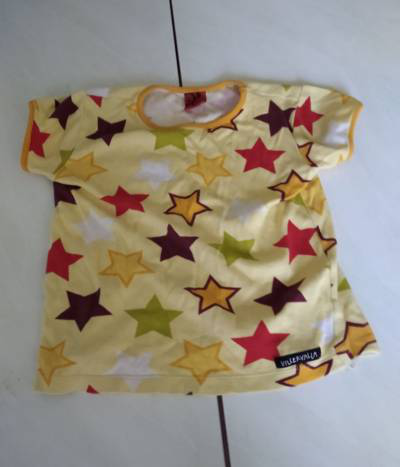

label: T-Shirt
kids: 1
rating: 0.906057054301616


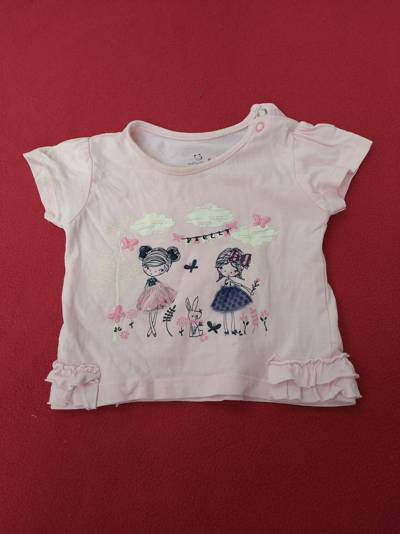

In [170]:
response_to_querry(df, 'wearable_data', data_info, column_info, display_info, 'show me two T-shirt for the kid which have highest rating')